In [8]:
from env import host, username, password
import pandas as pd
import numpy as np
from pydataset import data

### 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [25]:
mpg = data('mpg')
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




### a. On average, which manufacturer has the best miles per gallon?

In [26]:
#add an average mpg between both city and highway mpg
mpg['average_mileage'] = (mpg.cty + mpg.hwy) / 2
#make a new dataframe grouped by the manufacturer and make the columns their aggregated average values
avg_mpg = mpg.groupby('manufacturer').agg({'cty': 'mean', 'hwy': 'mean', 'average_mileage': 'mean'})
#sort these so you can see the top averages
avg_mpg.sort_values(by='average_mileage', ascending=False)

,cty,hwy,average_mileage
manufacturer,,,
honda,24.444444,32.555556,28.500000
volkswagen,20.925926,29.222222,25.074074
hyundai,18.642857,26.857143,22.750000
subaru,19.285714,25.571429,22.428571
audi,17.611111,26.444444,22.027778
toyota,18.529412,24.911765,21.720588
pontiac,17.000000,26.400000,21.700000
nissan,18.076923,24.615385,21.346154
chevrolet,15.000000,21.894737,18.447368


In [28]:
avg_mpg.sort_values(by='average_mileage', ascending=False).head(1)
#This shows that honda is the top manufacturer for mpg

,cty,hwy,average_mileage
manufacturer,,,
honda,24.444444,32.555556,28.5


### b. How many different manufacturers are there?

In [34]:
#Combining a len function with a .unique method finds that there are 15 manufacturers
len(mpg['manufacturer'].unique())

15

### c. How many different models are there?

In [ ]:
#Similarly combining len and .unique there are 38 different models
len(mpg['model'].unique())

### d. Do automatic or manual cars have better miles per gallon?

In [79]:
mpg['trans_cat'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
auto_vs_trans = mpg.groupby('trans_cat').agg({'average_mileage': 'mean'})
auto_vs_trans.sort_values(by='average_mileage', ascending=False)

,average_mileage
trans_cat,
manual,22.227273
auto,19.130573


### 2. Joining and Merging

### Copy the users and roles dataframes from the examples above.

In [114]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [115]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


### What do you think a right join would look like? 

In [116]:

pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


### An outer join? 

In [117]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


### What happens if you drop the foreign keys from the dataframes and try to merge them?

In [122]:
users = users.drop(columns = ['role_id'])
pd.merge(users, roles, left_on = 'role_id', right_on = 'id')

KeyError: "['role_id'] not found in axis"

In [121]:
users

,name
0,bob
1,joe
2,sally
3,adam
4,jane
5,mike


### 3. Getting data from SQL databases

### a. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [195]:
def get_db_url(user, pw, h, db_name):
    url = f'mysql+pymysql://{user}:{pw}@{h}/{db_name}'
    return url
emp_url = get_db_url(username, password, host, 'employees')

### b. Use your function to obtain a connection to the employees database.

In [199]:
pd.read_sql('SELECT * FROM employees', get_db_url(username, password, host, 'employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


### c. Once you have successfully run a query:

Intentionally make a typo in the database url. What kind of error message do you see?

In [202]:
#misspelling the database gives you an operational access denied error
pd.read_sql('SELECT * FROM employees', get_db_url(username, password, host, 'empdloyees'))

OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'darden_1036'@'%' to database 'empdloyees'")
(Background on this error at: http://sqlalche.me/e/e3q8)

Intentionally make an error in your SQL query. What does the error message look like?

In [203]:
#misspelling a sql query gives a programming error
pd.read_sql('SELECT * FROM eployees', emp_url)

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.eployees' doesn't exist")
[SQL: SELECT * FROM eployees]
(Background on this error at: http://sqlalche.me/e/f405)

### d. Read the employees and titles tables into two separate dataframes

In [204]:
employees = pd.read_sql('SELECT * FROM employees', emp_url)
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [205]:
titles = pd.read_sql('SELECT * FROM titles', emp_url)
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


### e. Visualize the number of employees with each title.

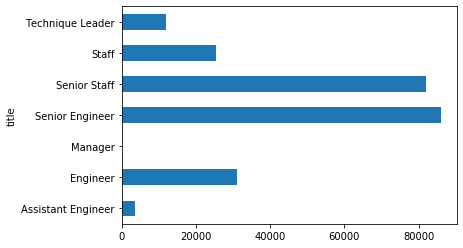

In [206]:
cur_titles = pd.read_sql('SELECT * FROM titles WHERE to_date > CURDATE()', emp_url)
num_titles = cur_titles.groupby('title').count()
num_titles.emp_no.plot(kind = 'barh')

### f. Join the employees and titles dataframes together.

In [207]:
emp_titles = pd.read_sql('SELECT * FROM employees as e JOIN titles as t ON e.emp_no = t.emp_no', emp_url)
emp_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,499997,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,499998,Staff,1993-12-27,1998-12-27


### g. Visualize how frequently employees change titles.

In [166]:
emp_titles = pd.merge(employees, titles, left_on='emp_no', right_on='emp_no')
title_changes = emp_titles.emp_no.value_counts().sum()
emp_totals = emp_titles.emp_no.value_counts().count()
title_rates = title_changes / emp_totals
title_rates

1.4775751273231474

### h. For each title, find the hire date of the employee that was hired most recently with that title.

In [208]:
cur_titles = pd.read_sql('SELECT * FROM titles as t WHERE to_date > CURDATE()', emp_url)
recent_hires = cur_titles.groupby('title').from_date.agg(['max'])
recent_hires

,max
title,
Assistant Engineer,2000-02-01
Engineer,2002-08-01
Manager,1996-08-30
Senior Engineer,2002-08-01
Senior Staff,2002-08-01
Staff,2000-02-01
Technique Leader,2000-02-01


### i. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [210]:
dept_emp = pd.read_sql('SELECT * FROM dept_emp as de WHERE to_date > CURDATE()', emp_url)
depts = pd.read_sql('SELECT * FROM departments', emp_url)
dept_titles.groupby('dept_no').title.agg(['count'])

,count
dept_no,
d001,23178
d002,19543
d003,20234
d004,81641
d005,94166
d006,22212
d007,58916
d008,24044
d009,27309
